# Тестирование графика числового фактора против бинарного таргета

In [1]:
# расширяем поле, убираем предупреждения
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:95% !important;}</style>'))

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Стандартные библиотеки для анализа
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

# Наша разработанная библиотека
from autobinary import TargetPlot

In [3]:
import sklearn as sk
import xgboost as xgb
import matplotlib as mplot
import autobinary as ab

print('sklearn: ', sk.__version__)
print('xgboost: ', xgb.__version__)
print('matplotlib: ', mplot.__version__)
print('autobinary: ', ab.__version__)

sklearn:  0.24.2
xgboost:  1.5.2
matplotlib:  3.1.0
autobinary:  1.0.4


In [4]:
sample = pd.read_csv('../data/train_titanic.csv')

print('Размерность данных:', sample.shape)
sample.head(2)

Размерность данных: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## 0. Без пропусков

==================== Отрисовка для фактора Age ====================


,index,Age,target_count,all_count,target_rate,rolling_mean
0,0,"(0.34, 8.378]",36,54,66.666667,87.318841
1,1,"(8.378, 16.336]",19,46,41.304348,46.217146
2,2,"(16.336, 24.294]",63,177,35.593220,37.738082
3,3,"(24.294, 32.252]",65,169,38.461538,39.146023
4,4,"(32.252, 40.21]",52,118,44.067797,40.220711
5,5,"(40.21, 48.168]",24,70,34.285714,39.826473
6,6,"(48.168, 56.126]",21,45,46.666667,41.279762
7,7,"(56.126, 64.084]",9,24,37.500000,30.416667
8,8,"(64.084, 72.042]",0,9,0.000000,21.875000
9,9,"(72.042, 80.0]",1,2,50.000000,50.000000


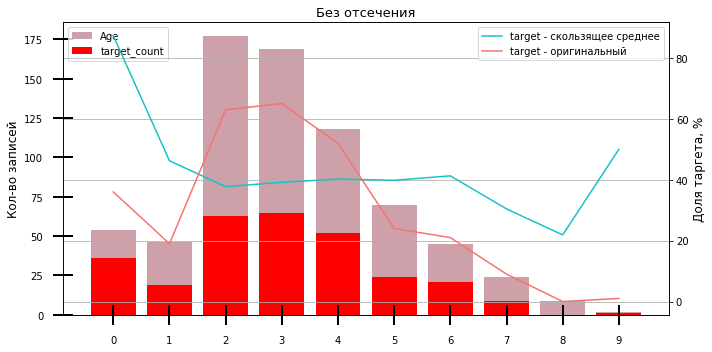

In [5]:
tt = TargetPlot(sample=sample[sample['Age'].notna()], feature='Age', target = 'Survived', bins=10)
tt.get_target_plot()

## 1. Без отсечения

==================== Отрисовка для фактора Age ====================


,index,Age,target_count,all_count,target_rate,rolling_mean
0,0,"(0.34, 8.378]",36,54,66.666667,87.318841
1,1,"(8.378, 16.336]",19,46,41.304348,46.217146
2,2,"(16.336, 24.294]",63,177,35.593220,37.738082
3,3,"(24.294, 32.252]",65,169,38.461538,39.146023
4,4,"(32.252, 40.21]",52,118,44.067797,40.220711
5,5,"(40.21, 48.168]",24,70,34.285714,39.826473
6,6,"(48.168, 56.126]",21,45,46.666667,41.279762
7,7,"(56.126, 64.084]",9,24,37.500000,30.416667
8,8,"(64.084, 72.042]",0,9,0.000000,21.875000
9,9,"(72.042, 80.0]",1,2,50.000000,50.000000


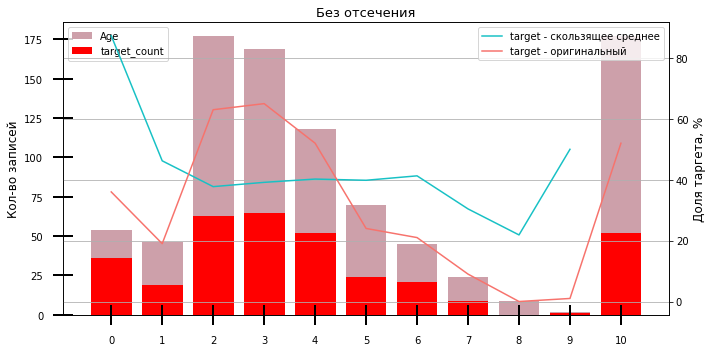

In [6]:
tt = TargetPlot(sample=sample, feature='Age', target = 'Survived', 
                bins=10)
tt.get_target_plot()

## 2. Отсечение слева

==================== Отрисовка для фактора Age ====================


,index,Age,target_count,all_count,target_rate,rolling_mean
0,0,lq: < 4.0,20,30,66.666667,NaN
1,1,"(3.924, 11.6]",19,38,50.000000,70.833333
2,2,"(11.6, 19.2]",40,96,41.666667,41.559140
3,3,"(19.2, 26.8]",51,155,32.903226,37.245638
4,4,"(26.8, 34.4]",66,159,41.509434,39.961832
5,5,"(34.4, 42.0]",47,107,43.925234,41.430884
6,6,"(42.0, 49.6]",20,55,36.363636,39.528980
7,7,"(49.6, 57.2]",17,41,41.463415,40.049889
8,8,"(57.2, 64.8]",9,22,40.909091,30.820399
9,9,"(64.8, 72.4]",0,9,0.000000,22.727273


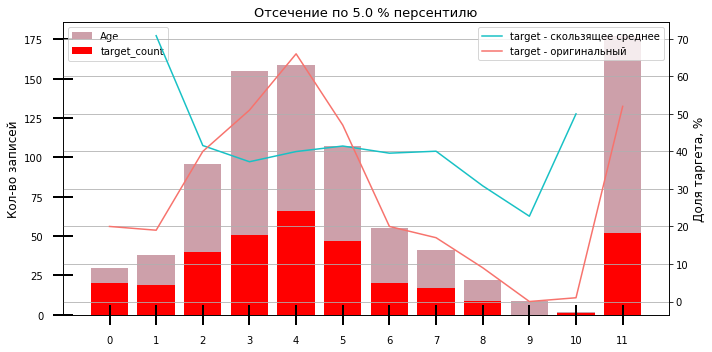

In [7]:
tt = TargetPlot(sample=sample, feature='Age', target = 'Survived', 
                bins=10, left_quant=0.05)
tt.get_target_plot()

## 3. Отсечение справа

==================== Отрисовка для фактора Age ====================


,index,Age,target_count,all_count,target_rate,rolling_mean
0,0,"(0.364, 5.978]",31,44,70.454545,87.121212
1,1,"(5.978, 11.536]",8,24,33.333333,46.502525
2,2,"(11.536, 17.094]",22,45,48.888889,40.616761
3,3,"(17.094, 22.652]",37,118,31.355932,37.442173
4,4,"(22.652, 28.21]",50,131,38.167939,37.318992
5,5,"(28.21, 33.768]",42,101,41.584158,41.413609
6,6,"(33.768, 39.326]",39,88,44.318182,41.930131
7,7,"(39.326, 44.884]",18,48,37.500000,40.123663
8,8,"(44.884, 50.442]",21,51,41.176471,40.308063
9,9,"(50.442, 56.0]",12,29,41.379310,61.967546


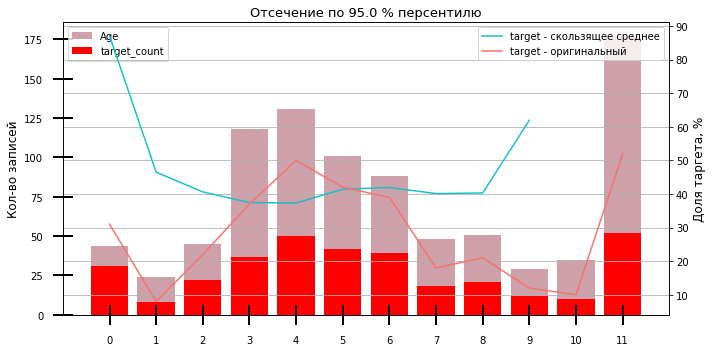

In [8]:
tt = TargetPlot(sample=sample, feature='Age', target = 'Survived', 
                bins=10, right_quant=0.05)
tt.get_target_plot()

## 4. Отсечение слева и справа

==================== Отрисовка для фактора Age ====================


,index,Age,target_count,all_count,target_rate,rolling_mean
0,0,lq: < 4.0,20,30,66.666667,NaN
1,1,"(3.948, 9.2]",18,32,56.250000,79.583333
2,2,"(9.2, 14.4]",7,15,46.666667,47.165948
3,3,"(14.4, 19.6]",34,87,39.080460,39.759528
4,4,"(19.6, 24.8]",39,114,34.210526,36.035683
5,5,"(24.8, 30.0]",48,131,36.641221,38.520970
6,6,"(30.0, 35.2]",41,88,46.590909,42.903521
7,7,"(35.2, 40.4]",28,67,41.791045,41.216719
8,8,"(40.4, 45.6]",17,49,34.693878,38.605511
9,9,"(45.6, 50.8]",16,37,43.243243,40.639919


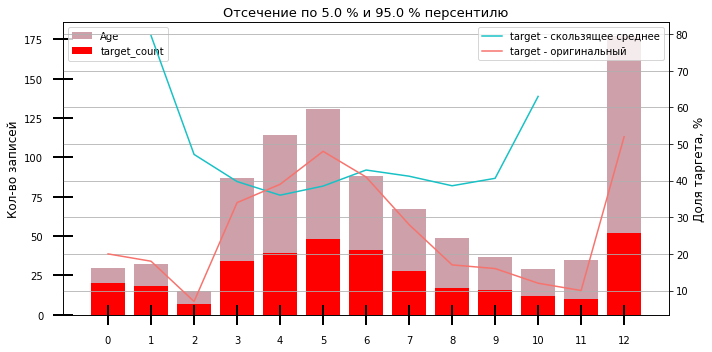

In [9]:
tt = TargetPlot(sample=sample, feature='Age', target = 'Survived', 
                bins=10, left_quant=0.05, right_quant=0.05)
tt.get_target_plot()

## 5. Отсечение слева и справа + спец значение

==================== Отрисовка для фактора Age ====================


,index,Age,target_count,all_count,target_rate,rolling_mean
0,0,lq: < 4.0,20,30,66.666667,NaN
1,1,"(3.948, 9.2]",18,32,56.250000,79.583333
2,2,"(9.2, 14.4]",7,15,46.666667,47.165948
3,3,"(14.4, 19.6]",34,87,39.080460,38.349754
4,4,"(19.6, 24.8]",24,84,28.571429,33.216135
5,5,"(24.8, 30.0]",48,131,36.641221,37.111195
6,6,"(30.0, 35.2]",41,88,46.590909,42.903521
7,7,"(35.2, 40.4]",28,67,41.791045,41.216719
8,8,"(40.4, 45.6]",17,49,34.693878,38.605511
9,9,"(45.6, 50.8]",16,37,43.243243,40.639919


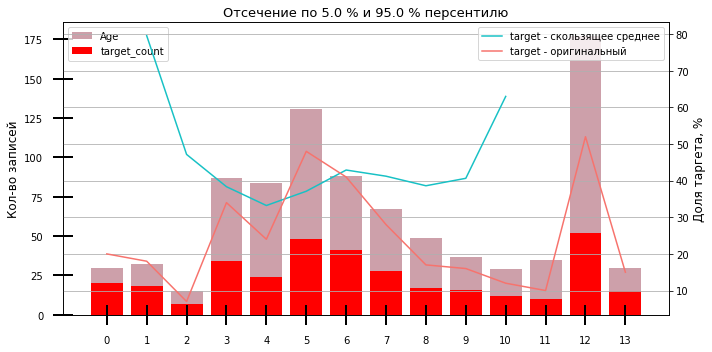

In [10]:
tt = TargetPlot(sample=sample, feature='Age', target = 'Survived', 
                bins=10, left_quant=0.05, right_quant=0.05, spec_value = 24)
tt.get_target_plot()

## 6. Отсечение слева и справа + спец значение + логарифмирование фактора

==================== Отрисовка для фактора Age ====================


,index,Age,target_count,all_count,target_rate,rolling_mean
0,0,lq: < -0.0142,7,7,100.000000,NaN
1,1,"(-0.00419, 0.419]",5,7,71.428571,86.428571
2,2,"(0.419, 0.838]",3,10,30.000000,53.690476
3,3,"(0.838, 1.257]",5,6,83.333333,68.809524
4,4,"(1.257, 1.676]",11,14,78.571429,72.619048
5,5,"(1.676, 2.095]",5,10,50.000000,51.309524
6,6,"(2.095, 2.514]",4,15,26.666667,36.547619
7,7,"(2.514, 2.933]",30,70,42.857143,36.172161
8,8,"(2.933, 3.352]",63,195,32.307692,37.487601
9,9,"(3.352, 3.771]",96,226,42.477876,38.931246


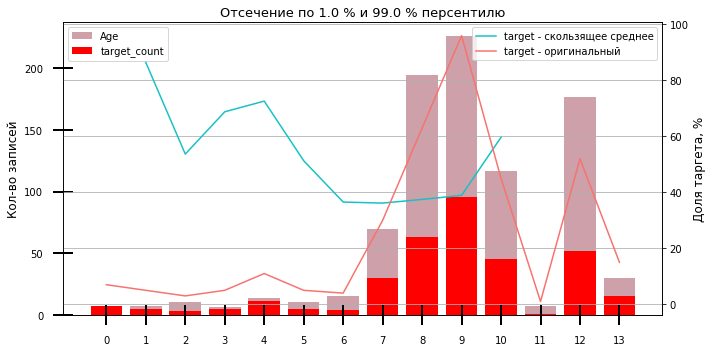

In [11]:
tt = TargetPlot(sample=sample, feature='Age', target = 'Survived', 
                bins=10, left_quant=0.01, right_quant=0.01, spec_value = 24, log=True)
tt.get_target_plot()